In [2]:
import pandas as pd
import kagglehub

/Users/imsks/Public/git-repos/learning/learning-ai/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
path = kagglehub.dataset_download("sudalairajkumar/indian-startup-funding")
csv_path = f"{path}/startup_funding.csv"

In [4]:
df = pd.read_csv(csv_path)
# df.head()
# df.shape
# df.info()

In [5]:
# Data Cleaning

# df.isnull().sum()

In [6]:
# 1. Clean City Names

df[df['City  Location'].isnull()]

df['City  Location'] = df['City  Location'].str.strip().str.title()

df["City  Location"] = df["City  Location"].replace({
    'Delhi': 'New Delhi',
    'Bangalore': 'Bengaluru'
})

In [7]:
df["Amount in USD"].unique()[:20]

def clean_funding(x):
    if pd.isnull(x):
        return 0
    if isinstance(x, str):
        x = x.replace(',', '')
        if x.strip().lower() == 'undisclosed':
            return 0
        
    try:
        return float(x)
    except:
        return 0
    
df["Amount in USD"] = df["Amount in USD"].apply(clean_funding)

In [8]:
df["Date dd/mm/yyyy"] = pd.to_datetime(df["Date dd/mm/yyyy"], errors='coerce')
df['Year'] = df['Date dd/mm/yyyy'].dt.year
df['Month'] = df['Date dd/mm/yyyy'].dt.month

In [9]:
# df.head(10)
df[['Startup Name', 'City  Location', 'Amount in USD', 'Year']].sample(5)

,Startup Name,City Location,Amount in USD,Year
14,Trell,Bengaluru,2000000.0,NaN
97,Bira91,New Delhi,5600000.0,NaN
1003,Cartrade,Mumbai,55000000.0,2017.0
1365,Glam Studios,Noida,300000.0,2016.0
25,Clumio,"San Jose,",135000000.0,NaN


<Axes: xlabel='City  Location'>

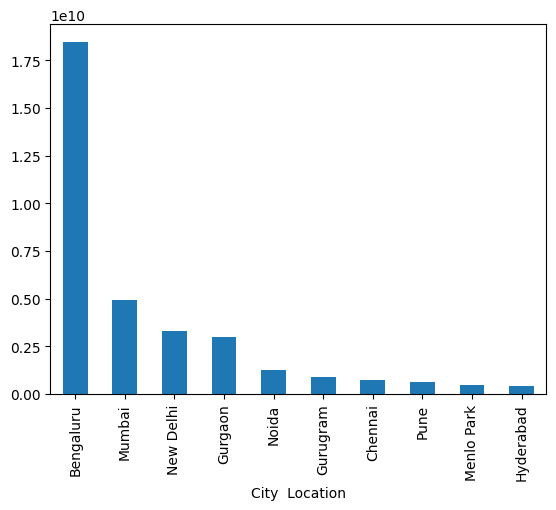

In [19]:
df.groupby("City  Location")["Amount in USD"].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='Industry Vertical'>

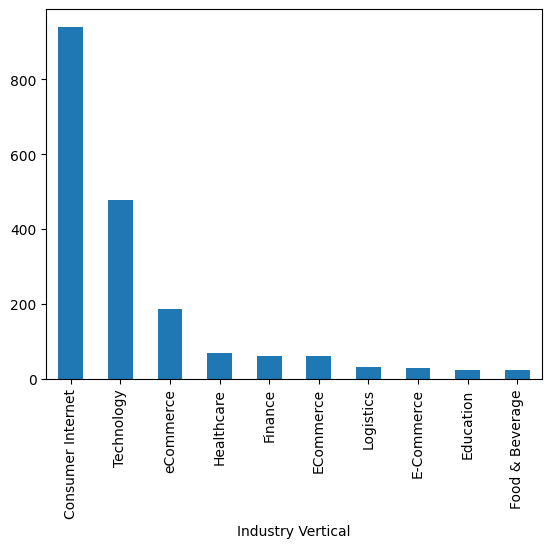

In [20]:
df["Industry Vertical"].value_counts().head(10).plot(kind='bar')

<Axes: title={'center': 'Funding over Years'}, xlabel='Year'>

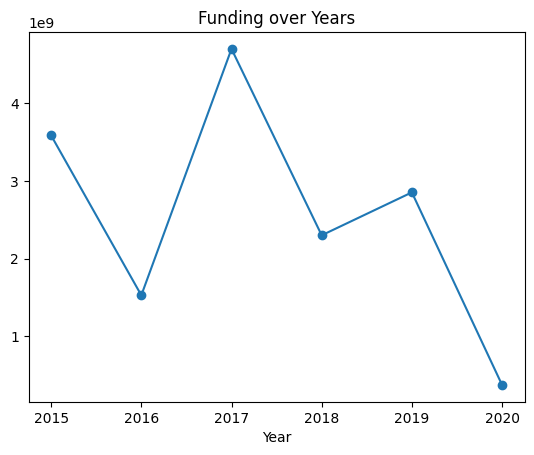

In [26]:
df.groupby("Year")['Amount in USD'].sum().plot(kind='line', marker='o', title='Funding over Years')

<Axes: title={'center': 'Number of Funded Startups per Year'}, xlabel='Year'>

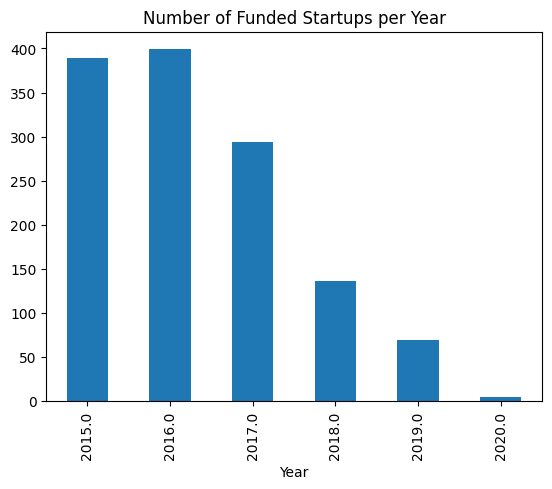

In [30]:
df.groupby("Year")["Startup Name"].count().plot(kind="bar", title="Number of Funded Startups per Year")

In [34]:
df.groupby("City  Location")["Amount in USD"].agg(["count", "sum", "mean"]).sort_values(by="sum", ascending=False).head(10)

,count,sum,mean
City Location,,,
Bengaluru,841,1.846017e+10,2.195026e+07
Mumbai,567,4.921185e+09,8.679339e+06
New Delhi,455,3.291572e+09,7.234223e+06
Gurgaon,287,3.005296e+09,1.047142e+07
Noida,92,1.262864e+09,1.372678e+07
Gurugram,50,8.659325e+08,1.731865e+07
Chennai,97,7.187670e+08,7.409969e+06
Pune,105,6.330820e+08,6.029352e+06
Menlo Park,1,4.500000e+08,4.500000e+08


In [45]:
df[df['City  Location'] == 'Bengaluru'].head(5)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Year,Month
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN,2020.0,9.0
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN,2020.0,9.0
9,10,2019-03-12,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,50000000.0,NaN,2019.0,3.0
11,12,NaT,Healthians,B2B-focused foodtech startup,Food Solutions For Corporate,Bengaluru,"Paytm, NPTK, Sabre Partners and Neoplux",Series C,12000000.0,NaN,NaN,NaN
12,13,NaT,Licious,E-Commerce,Online Meat And Seafood Ordering Startup,Bengaluru,Vertex Growth Fund,Series E,30000000.0,NaN,NaN,NaN
